#Overview of algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function and its derivative
def f(x):
    return x**2 - np.log(x)

def df(x):
    return 2*x - 1/x

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

In [3]:
# Initial point
x0 = 2
alpha = 0.3

In [4]:
# Gradient descent update
x1 = x0 - alpha * df(x0)
x2 = x1 - alpha * df(x1)
# Points for the function plot
x = np.linspace(-2.5, 2.5, 400)
y = f(x)

<ipython-input-2-d9c6163331f0>:3: RuntimeWarning: invalid value encountered in log
  return x**2 - np.log(x)


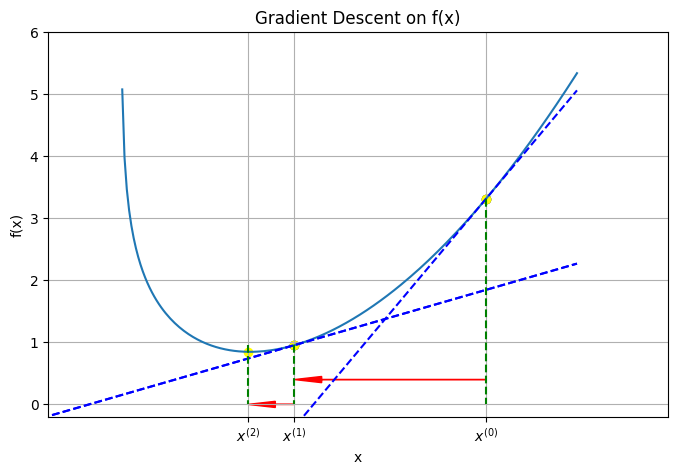

In [8]:
# Tangent line at x0 (y = m*x + b)

# Creating the plot

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = x^2')
plt.scatter([x0, x1], [f(x0), f(x1)], color='black')  # Points
m = df(x0)
b = f(x0) - m*x0
tangent_line = m*x + b
plt.plot(x, tangent_line, 'b--', label=f'Tangent at x0={x0}')
plt.arrow(x0, 0.4, x1-x0, 0.0, head_width=0.1, length_includes_head=True, color = 'r')

m = df(x1)
b = f(x1) - m*x1
tangent_line = m*x + b
plt.plot(x, tangent_line, 'b--', label=f'Tangent at x0={x1}', )
plt.ylim([-0.2,6])
plt.xlim([-0.4,3])
plt.plot(x, tangent_line, 'b--', label=f'Tangent at x0={x1}', )
m = df(x0)
b = f(x0) - m*x0
tangent_line = m*x + b

plt.scatter(x0, f(x0), color='yellow')  # Initial point
plt.scatter(x1, f(x1), color='yellow')  # Next point after step
plt.scatter(x2, f(x2), color='yellow')  # Next point after step

plt.arrow(x1, 0., x2-x1, 0., head_width=0.1, length_includes_head=True, color = 'r')

plt.title('Gradient Descent on f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xticks([])  # Remove x-axis ticks
plt.xticks([x0, x1, x2], [r"$x^{(0)}$", r"$x^{(1)}$", r"$x^{(2)}$"])
#plt.legend()
plt.grid(True)
plt.plot([x0, x0],[f(x0), 0],'g--')
plt.plot([x1, x1],[f(x1), 0],'g--')
plt.plot([x2, x2],[f(x1), 0],'g--')
plt.show()

#A simple implementation of gradient descent

In [9]:
from numpy import linalg as la

def steepest_descent(f, gradient, initial_guess, learning_rate, num_iterations = 100, epsilon_g = 1e-07):
    x = initial_guess
    for i in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        normg = la.norm(grad)
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}, ||g(x)||={normg}")
        ## Termination condition
        if  normg < epsilon_g:
            break
    return x

In [10]:
def f(x):
    return np.sum((x-3.0)**2)

def gradient(x):
    return 2*(x-3.0)

steepest_descent(f, gradient, np.array([0., 0.]), 0.2)

Iteration 1: x = [1.2 1.2], f(x) = 6.479999999999999, ||g(x)||=8.48528137423857
Iteration 2: x = [1.92 1.92], f(x) = 2.3327999999999993, ||g(x)||=5.091168824543142
Iteration 3: x = [2.352 2.352], f(x) = 0.8398079999999992, ||g(x)||=3.0547012947258847
Iteration 4: x = [2.6112 2.6112], f(x) = 0.3023308799999997, ||g(x)||=1.8328207768355302
Iteration 5: x = [2.76672 2.76672], f(x) = 0.10883911679999973, ||g(x)||=1.099692466101318
Iteration 6: x = [2.860032 2.860032], f(x) = 0.039182082047999806, ||g(x)||=0.6598154796607905
Iteration 7: x = [2.9160192 2.9160192], f(x) = 0.014105549537279988, ||g(x)||=0.39588928779647375
Iteration 8: x = [2.94961152 2.94961152], f(x) = 0.005077997833420814, ||g(x)||=0.23753357267788475
Iteration 9: x = [2.96976691 2.96976691], f(x) = 0.0018280792200315037, ||g(x)||=0.1425201436067311
Iteration 10: x = [2.98186015 2.98186015], f(x) = 0.0006581085192113414, ||g(x)||=0.08551208616403891
Iteration 11: x = [2.98911609 2.98911609], f(x) = 0.00023691906691608675, 

array([2.99999998, 2.99999998])

#Derivative Calculation

In [11]:
import numpy as np
from scipy.optimize import approx_fprime


epsilon = np.sqrt(np.finfo(float).eps)

# Point at which to calculate the gradient
x0 = np.array([1.0, 2.0])

# Calculate the gradient at the point x0
gradient = approx_fprime(x0, f, epsilon)

print("Gradient at x0:", gradient)

Gradient at x0: [-4. -2.]


In [12]:
#AUTOMATIC DIFFERENTIATION
import autograd.numpy as np   # Import wrapped NumPy
from autograd import grad    # Import the gradient function

# Create a function that returns the derivative of f
df = grad(f)

# Evaluate the derivative at x = pi
print("The derivative of f(x) at x = [0.2, 0.1] is:", df(np.array([0.2, 0.1])))

The derivative of f(x) at x = [0.2, 0.1] is: [-5.6 -5.8]


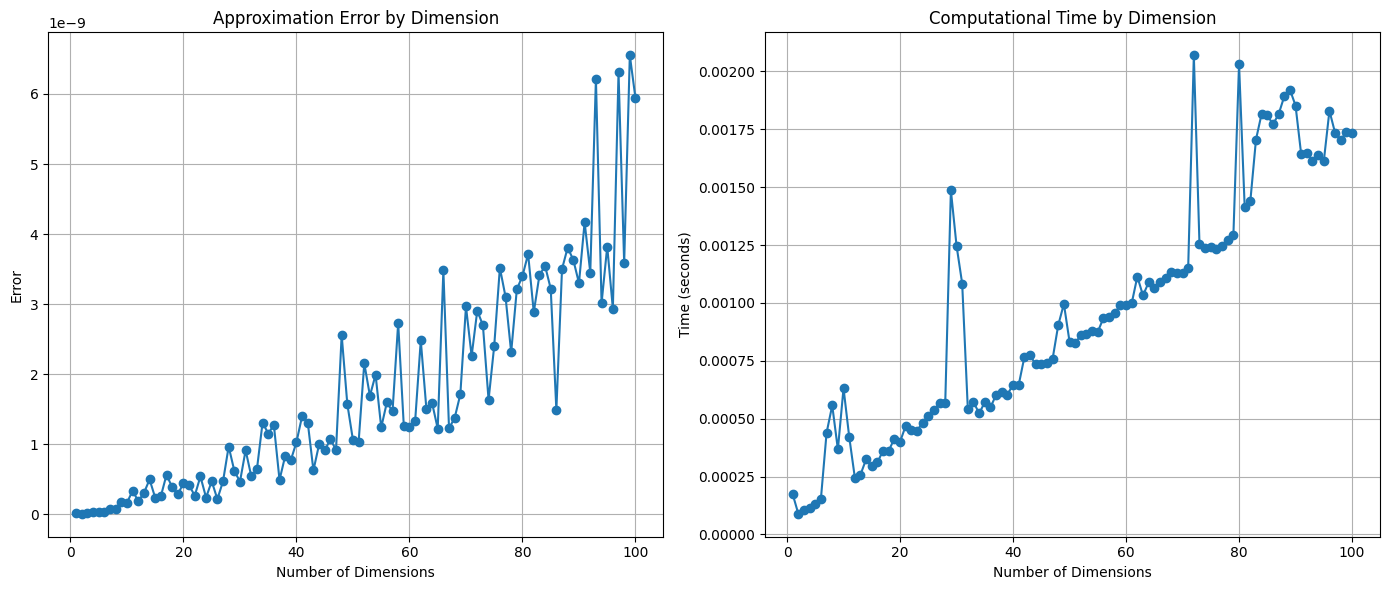

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

def multivariate_function(x):
    """ A sample multivariate function, sum of squares plus sin of each component. """
    return np.sum(x**2 + np.sin(x))

def analytical_derivative(x):
    """ Analytical derivative of the multivariate function. """
    return 2*x + np.cos(x)

def finite_difference_derivative(f, x, h=1e-5):
    """ Compute the gradient of `f` at `x` using the central finite difference method. """
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = np.copy(x)
        x_minus = np.copy(x)
        x_plus[i] += h
        x_minus[i] -= h
        grad[i] = (f(x_plus) - f(x_minus)) / (2*h)
    return grad

# Range of dimensions
dimensions = range(1, 101)
errors = []
times = []

# Loop over dimensions
for dim in dimensions:
    x = np.random.randn(dim)

    # Analytical derivative
    true_grad = analytical_derivative(x)

    # Start timing
    start_time = time.time()

    # Finite difference derivative
    fd_grad = finite_difference_derivative(multivariate_function, x)

    # End timing
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Error
    error = np.linalg.norm(fd_grad - true_grad)
    errors.append(error)

# Plotting error
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(dimensions, errors, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Error')
plt.title('Approximation Error by Dimension')
plt.grid(True)

# Plotting computational time
plt.subplot(1, 2, 2)
plt.plot(dimensions, times, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Time (seconds)')
plt.title('Computational Time by Dimension')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
#MINIMIZATION

import numpy as np
from scipy.optimize import minimize
initial_guess = np.array([0, 0])
result = minimize(f, initial_guess, method='BFGS')

print("Optimal parameters:", result.x)
print("Minimum value:", result.fun)
print("Success:", result.success)
print("Message:", result.message)

Optimal parameters: [2.99999999 2.99999999]
Minimum value: 2.460284085377308e-16
Success: True
Message: Optimization terminated successfully.


In [16]:
#To add some bounds to the variables we can use the Bounds module.
from scipy.optimize import Bounds

# Define bounds (0, +Inf) for all parameters
bounds = Bounds(np.array([0., 0.]), [np.inf, np.inf])

# Run the optimization with bounds
result_with_bounds = minimize(f, initial_guess, method='L-BFGS-B', bounds=bounds)
print("Optimal parameters:", result_with_bounds.x)
print("Minimum value:", result_with_bounds.fun)
print("Success:", result_with_bounds.success)
print("Message:", result_with_bounds.message)

Optimal parameters: [3.00000044 3.00000044]
Minimum value: 3.933211619922953e-13
Success: True
Message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL


#The AR(7) likelihood

In [17]:
import numpy as np
import scipy
def unconditional_ar_mean_variance(c, phis, sigma2):
    ## The length of phis is p
    p = len(phis)
    A = np.zeros((p, p))
    A[0, :] = phis
    A[1:, 0:(p-1)] = np.eye(p-1)
    ## Check for stationarity
    eigA = np.linalg.eig(A)
    if all(np.abs(eigA.eigenvalues)<1):
        stationary = True
    else:
        stationary = False
    # Create the vector b
    b = np.zeros((p, 1))
    b[0, 0] = c

    # Compute the mean using matrix algebra
    I = np.eye(p)
    mu = np.linalg.inv(I - A) @ b

    # Solve the discrete Lyapunov equation
    Q = np.zeros((p, p))
    Q[0, 0] = sigma2
    #Sigma = np.linalg.solve(I - np.kron(A, A), Q.flatten()).reshape(7, 7)
    Sigma = scipy.linalg.solve_discrete_lyapunov(A, Q)

    return mu.ravel(), Sigma, stationary

# Example usage:
phis = [0.2, -0.1, 0.05, -0.05, 0.02, -0.02, 0.01]
c = 0
sigma2 = 0.5
mu, Sigma, stationary = unconditional_ar_mean_variance(c, phis, sigma2)
print("The process is stationary:", stationary)
print("Mean vector (mu):", mu)
print("Variance-covariance matrix (Sigma);", Sigma)

The process is stationary: True
Mean vector (mu): [0. 0. 0. 0. 0. 0. 0.]
Variance-covariance matrix (Sigma); [[ 0.52248632  0.09320012 -0.0271827   0.0058952  -0.01510039 -0.00131484
  -0.00475276]
 [ 0.09320012  0.52248632  0.09320012 -0.0271827   0.0058952  -0.01510039
  -0.00131484]
 [-0.0271827   0.09320012  0.52248632  0.09320012 -0.0271827   0.0058952
  -0.01510039]
 [ 0.0058952  -0.0271827   0.09320012  0.52248632  0.09320012 -0.0271827
   0.0058952 ]
 [-0.01510039  0.0058952  -0.0271827   0.09320012  0.52248632  0.09320012
  -0.0271827 ]
 [-0.00131484 -0.01510039  0.0058952  -0.0271827   0.09320012  0.52248632
   0.09320012]
 [-0.00475276 -0.00131484 -0.01510039  0.0058952  -0.0271827   0.09320012
   0.52248632]]


In [18]:
#CONDITIONAL LIKEHOOD

from scipy.stats import norm
from scipy.stats import multivariate_normal
import numpy as np

def lagged_matrix(Y, max_lag=7):
    n = len(Y)
    lagged_matrix = np.full((n, max_lag), np.nan)
    # Fill each column with the appropriately lagged data
    for lag in range(1, max_lag + 1):
        lagged_matrix[lag:, lag - 1] = Y[:-lag]
    return lagged_matrix


def cond_loglikelihood_ar7(params, y):
    c = params[0]
    phi = params[1:8]
    sigma2 = params[8]
    mu, Sigma, stationary = unconditional_ar_mean_variance(c, phi, sigma2)
    ## We could check that at phis the process is stationary and return -Inf if it is not
    if not(stationary):
        return -np.inf
    ## The distribution of
    # y_t|y_{t-1}, ..., y_{t-7} ~ N(c+\phi_{1}*y_{t-1}+...+\phi_{7}y_{t-7}, sigma2)
    ## Create lagged matrix
    X = lagged_matrix(y, 7)
    yf = y[7:]
    Xf = X[7:,:]
    loglik = np.sum(norm.logpdf(yf, loc=(c + Xf@phi), scale=np.sqrt(sigma2)))
    return loglik

def uncond_loglikelihood_ar7(params, y):
    ## The unconditional loglikelihood
    ## is the unconditional "plus" the density of the
    ## first p (7 in our case) observations
    cloglik = cond_loglikelihood_ar7(params, y)

    ## Calculate initial
    # y_1, ..., y_7 ~ N(mu, sigma_y)
    c = params[0]
    phi = params[1:8]
    sigma2 = params[8]
    mu, Sigma, stationary = unconditional_ar_mean_variance(c, phi, sigma2)
    if not(stationary):
        return -np.inf
    mvn = multivariate_normal(mean=mu, cov=Sigma, allow_singular=True)
    uloglik = cloglik + mvn.logpdf(y[0:7])
    return uloglik


## Example
params = np.array([
    0.0, ## c
    0.2, -0.1, 0.05, -0.05, 0.02, -0.02, 0.01, ## phi
    1.0 ## sigma2
    ])

## Fake data
y = np.random.normal(size=100)

## The conditional distribution
cond_loglikelihood_ar7(params, y)
## The unconditional distribution
uncond_loglikelihood_ar7(params, y)

-144.58897926794316

In [21]:
#MAXIMUM LIKEHOOD
## Unconditional - define the negative loglikelihood

## Starting value.
## These estimates should be close to the OLS
X = lagged_matrix(y, 7)
yf = y[7:]
Xf = np.hstack((np.ones((93,1)), X[7:,:]))
beta = np.linalg.solve(Xf.T@Xf, Xf.T@yf)
sigma2_hat = np.mean((yf - Xf@beta)**2)

params = np.hstack((beta, sigma2_hat))

def cobj(params, y):
    return - cond_loglikelihood_ar7(params,y)

results = scipy.optimize.minimize(cobj, params, args = y, method='L-BFGS-B')

## If everything is correct, results.x should be equal to the OLS parameters.

## Not the conditional

def uobj(params, y):
    return - uncond_loglikelihood_ar7(params,y)

bounds_constant = tuple((-np.inf, np.inf) for _ in range(1))
bounds_phi = tuple((-1, 1) for _ in range(7))
bounds_sigma = tuple((0,np.inf) for _ in range(1))
bounds = bounds_constant + bounds_phi + bounds_sigma

## L-BFGS-B support bounds
results = scipy.optimize.minimize(uobj, results.x, args = y, method='L-BFGS-B', bounds = bounds)